In [23]:
from dataset import *
from torch.utils.data import DataLoader
from model import *
import torch

import os 

device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')


weight_dir = '/nas2/lait/tjfwownd/hyperdiff/data/photoshape_weight/weight'
#weight_dataset = EvalDataset(weight_dir)
weight_dataset = WeightDataset_Test(weight_dir)
loader = DataLoader(dataset = weight_dataset,
                   batch_size = 4,
                   shuffle = True,
                   num_workers=12
                    )

580


In [4]:
net = Latent_injection_Transformer(device=device).to(device)
ckpt = torch.load('result/best_data_all_MSE.pth',map_location=device)

net.load_state_dict(ckpt)

for weight,path in loader:
    print(path)
    weigt=weight.to(device)
    result = net(weight)
    
    torch.save(result, "result/test_data_all_MSE.bin")
    break

('/nas2/lait/tjfwownd/hyperdiff/data/photoshape_weight/weight/shape09195_rank04.bin', '/nas2/lait/tjfwownd/hyperdiff/data/photoshape_weight/weight/shape09194_rank05.bin', '/nas2/lait/tjfwownd/hyperdiff/data/photoshape_weight/weight/shape09195_rank01.bin', '/nas2/lait/tjfwownd/hyperdiff/data/photoshape_weight/weight/shape09194_rank07.bin')


In [32]:
import numpy as np
import torch.nn as nn
#nn.L1Loss()(weight_dataset[0],weight_dataset[1])
#torch.std(weight_dataset[:,:494592])#,torch.max(weight_dataset[2]), torch.min(weight_dataset[2])
torch.mean(torch.tensor([weight_dataset[i][:494592] for i in range(len(weight_dataset))]))

ValueError: only one element tensors can be converted to Python scalars

In [43]:
output=[]
for w in [weight_dataset[i][:494592] for i in range(len(weight_dataset))]:
    output.append(w)

result = torch.cat(output,dim=0)
torch.std(result),torch.mean(result)


(tensor(0.6099), tensor(0.0371))

In [44]:
output=[]
for w in [weight_dataset[i][494592:494592+3072] for i in range(len(weight_dataset))]:
    output.append(w)

result = torch.cat(output,dim=0)
torch.std(result),torch.mean(result)


(tensor(0.4210), tensor(0.0085))

In [45]:
output=[]
for w in [weight_dataset[i][494592+3072:] for i in range(len(weight_dataset))]:
    output.append(w)

result = torch.cat(output,dim=0)
torch.std(result),torch.mean(result)


(tensor(0.3266), tensor(-0.0125))

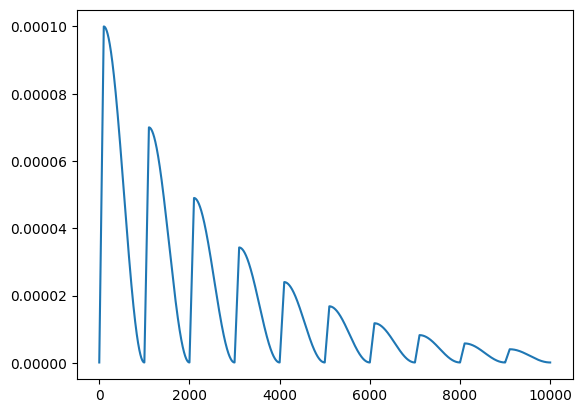

In [17]:
from util import *
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

def visualize_scheduler(optimizer,scheduler,epochs):
    lrs=[]
    for _ in range(epochs):
        optimizer.step()
        lrs.append(optimizer.param_groups[0]['lr'])
        scheduler.step()
    plt.plot(lrs)
    plt.show()

epochs = 10000
optimizer = optim.SGD([torch.tensor(1)],lr=1e-7,momentum=0.9)
scheduler = CosineAnnealingWarmUpRestarts(optimizer,T_0=1000,T_mult=1,eta_max=1e-4,T_up=100,gamma=0.7)
#scheduler = CosineWarmupScheduler(optimizer,warmup=100,max_iters=epochs)
visualize_scheduler(optimizer,scheduler, epochs)

In [1]:
import torch
ckpt = torch.load('/nas2/lait/tjfwownd/hyperdiff/weight_encoding/weight_transformer/result/best_data_all_MSE.pth')

In [7]:
ckpt['curr_epoch']

322